<a href="https://colab.research.google.com/github/AmandeepRandhawa/Dashboard/blob/main/Group1_Charts%26Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Installing modules, importing libraries, loading dataset**

In [ ]:
!pip install squarify==0.4.3
!pip install pywaffle
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 13.0 MB/s eta 0:00:00


In [ ]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
print ('Data Analysis Libraries imported!')

# Standard Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import squarify
import plotly.express as px
print ('Standard Visualization Libraries imported!')

# Word Cloud Libraries
from wordcloud import WordCloud, STOPWORDS
import urllib
from PIL import Image
print ('Wordcloud libraries imported!')

# Waffle Chart Libraries
from pywaffle import Waffle
print('Pywaffle libraries imported!')

# Geospatial Visualization Libraries
import geopandas as gpd
from geopandas import GeoDataFrame
import folium
import plotly.graph_objects as go
print('Geopandas, Folium libraries imported!')

Data Analysis Libraries imported!
Standard Visualization Libraries imported!
Wordcloud libraries imported!
Pywaffle libraries imported!
Geopandas, Folium libraries imported!


In [ ]:
#importing dataset from github: Global Superstore

filepath = 'https://raw.githubusercontent.com/ANK002X/Datasets/main/superstore.csv'
df = pd.read_csv(filepath)
print('Dataset imported!')

Dataset imported!


#**Exploratory Data Analysis**

In [ ]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [ ]:
df.shape

(51290, 27)

In [ ]:
df.dtypes

,0
Category,object
City,object
Country,object
Customer.ID,object
Customer.Name,object
Discount,float64
Market,object
记录数,int64
Order.Date,object
Order.ID,object


In [ ]:
df.tail()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04 00:00:00.000,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04 00:00:00.000,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21 00:00:00.000,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26 00:00:00.000,First Class,15.95,California,Binders,2014,North America,52
51289,Office Supplies,Los Angeles,United States,FH-143654,Fred Hopkins,0.2,US,1,2014-12-26 00:00:00.000,CA-2014-121398,...,154,Corporate,2014-12-30 00:00:00.000,Standard Class,9.59,California,Binders,2014,North America,52


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [ ]:
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


In [ ]:
df.isnull().sum()

,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


# **Data Preprocessing**

**Dropping Column: 记录数 (English: Number of records)**

In [ ]:
df = df.drop(columns=['记录数'])
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


**Creating a new column 'Continent' and mapping the countries to the respective continents**

In [ ]:
# Dictionary with correct country-to-continent mapping
country_to_continent = {
    # Africa
    'South Africa': 'Africa', 'Democratic Republic of the Congo': 'Africa', 'Niger': 'Africa',
    'Madagascar': 'Africa', 'Egypt': 'Africa', 'Morocco': 'Africa', 'Cameroon': 'Africa',
    'Ghana': 'Africa', 'Chad': 'Africa', 'Kenya': 'Africa', 'Djibouti': 'Africa',
    'Zambia': 'Africa', 'Angola': 'Africa', 'Tanzania': 'Africa', 'Sierra Leone': 'Africa',
    'Liberia': 'Africa', 'Guinea-Bissau': 'Africa', 'Somalia': 'Africa', 'Senegal': 'Africa',
    'Tunisia': 'Africa', 'Mali': 'Africa', 'Algeria': 'Africa', 'Benin': 'Africa',
    'Ethiopia': 'Africa', 'Libya': 'Africa', 'Mozambique': 'Africa', 'Togo': 'Africa',
    "Cote d'Ivoire": 'Africa', 'Lesotho': 'Africa', 'Rwanda': 'Africa', 'Sudan': 'Africa',
    'Guinea': 'Africa', 'Republic of the Congo': 'Africa', 'Namibia': 'Africa',
    'Central African Republic': 'Africa', 'Eritrea': 'Africa', 'Mauritania': 'Africa',
    'Swaziland': 'Africa', 'Gabon': 'Africa', 'Equatorial Guinea': 'Africa',
    'South Sudan': 'Africa', 'Burundi': 'Africa', 'Nigeria': 'Africa', 'Uganda': 'Africa',
    'Zimbabwe': 'Africa',

    # North America
    'Canada': 'North America', 'United States': 'North America', 'Mexico': 'North America',

    # Caribbean
    'Cuba': 'North America', 'Trinidad and Tobago': 'North America', 'Guadeloupe': 'North America',
    'Jamaica': 'North America', 'Martinique': 'North America', 'Barbados': 'North America',
    'Dominican Republic': 'North America', 'Haiti': 'North America',

    # Central and South America
    'El Salvador': 'South America', 'Guatemala': 'South America', 'Nicaragua': 'South America',
    'Panama': 'South America', 'Honduras': 'South America', 'Brazil': 'South America',
    'Colombia': 'South America', 'Chile': 'South America', 'Uruguay': 'South America',
    'Bolivia': 'South America', 'Ecuador': 'South America', 'Paraguay': 'South America',
    'Argentina': 'South America', 'Peru': 'South America', 'Venezuela': 'South America',

    # Europe
    'France': 'Europe','Italy': 'Europe','Spain': 'Europe','Portugal': 'Europe','Germany': 'Europe',
    'Austria': 'Europe', 'Belgium': 'Europe','Switzerland': 'Europe', 'Netherlands':
    'Europe', 'United Kingdom': 'Europe', 'Norway': 'Europe', 'Finland': 'Europe',
    'Sweden': 'Europe', 'Denmark': 'Europe','Ireland': 'Europe', 'Russia': 'Europe',
    'Poland': 'Europe', 'Ukraine': 'Europe', 'Bulgaria': 'Europe', 'Czech Republic': 'Europe',
    'Hungary': 'Europe', 'Romania': 'Europe', 'Belarus': 'Europe', 'Georgia': 'Europe',
    'Croatia': 'Europe', 'Israel': 'Europe', 'Montenegro': 'Europe', 'Moldova': 'Europe',
    'Estonia': 'Europe', 'Albania': 'Europe', 'Slovakia': 'Europe',
    'Bosnia and Herzegovina': 'Europe', 'Armenia': 'Europe', 'Slovenia': 'Europe',
    'Macedonia': 'Europe', 'Turkey': 'Europe', 'Lithuania': 'Europe',

    # Asia
    'India': 'Asia', 'Bangladesh': 'Asia', 'Afghanistan': 'Asia', 'Nepal': 'Asia',
    'Sri Lanka': 'Asia', 'Pakistan': 'Asia', 'Hong Kong': 'Asia', 'China': 'Asia',
    'Japan': 'Asia', 'Taiwan': 'Asia', 'South Korea': 'Asia', 'Mongolia': 'Asia',
    'Malaysia': 'Asia', 'Singapore': 'Asia', 'Cambodia': 'Asia', 'Thailand': 'Asia',
    'Myanmar (Burma)': 'Asia', 'Vietnam': 'Asia', 'Philippines': 'Asia', 'Indonesia': 'Asia',
    'Kazakhstan': 'Asia', 'Uzbekistan': 'Asia', 'Kyrgyzstan': 'Asia', 'Bahrain': 'Asia',
    'United Arab Emirates': 'Asia', 'Qatar': 'Asia', 'Saudi Arabia': 'Asia', 'Iran': 'Asia',
    'Iraq': 'Asia', 'Jordan': 'Asia', 'Lebanon': 'Asia', 'Syria': 'Asia', 'Yemen': 'Asia',
    'Azerbaijan': 'Asia', 'Armenia': 'Asia', 'Turkey': 'Asia', 'Turkmenistan': 'Asia',
    'Tajikistan': 'Asia', 'Mongolia': 'Asia',

    # Oceania
    'New Zealand': 'Oceania', 'Australia': 'Oceania', 'Papua New Guinea': 'Oceania',

    # Other
    'South Sudan': 'Africa', 'Sudan': 'Africa', 'Mauritania': 'Africa', 'Central African Republic': 'Africa'
}

In [ ]:
# Mapping the countries to the respective continents using the dictionary 'country_to_continent'
df['Continent'] = df['Country'].map(country_to_continent)

In [ ]:
df[['Continent','Country','Sales']].groupby(['Continent', 'Country']).agg('sum').head(55)

Sales
Continent Country                                 
Africa    Algeria                            36090
          Angola                             25551
          Benin                               6215
          Burundi                              268
          Cameroon                           22355
          Central African Republic            2376
          Chad                                1317
          Cote d'Ivoire                      25615
          Democratic Republic of the Congo   87415
          Djibouti                            2394
          Egypt                              84137
          Equatorial Guinea                    150
          Eritrea                              188
          Ethiopia                             850
          Gabon                               1752
          Ghana                              23272
          Guinea                              3498
          Guinea-Bissau                       2065
          Kenya                              17569
          Lesotho                             6712
          Liberia                             3561
          Libya                               7809
          Madagascar                         12618
          Mali                                8915
          Mauritania                          4020
          Morocco                            87079
          Mozambique                         21302
          Namibia                             2899
          Niger                               6923
          Nigeria                            54347
          Republic of the Congo               2714
          Rwanda                              5197
          Senegal                            28850
          Sierra Leone                        2449
          Somalia                             8185
          South Africa                       95301
          South Sudan                         1045
          Sudan                              16336
          Swaziland                            288
          Tanzania                           26816
          Togo                                4150
          Tunisia                             1762
          Uganda                              1625
          Zambia                             26029
          Zimbabwe                            3767
Asia      Afghanistan                        21674
          Armenia                              156
          Azerbaijan                          5630
          Bahrain                              669
          Bangladesh                         78254
          Cambodia                           17476
          China                             700591
          Hong Kong                           6148
          India                             589664
          Indonesia                         404887

# **Visualizations**

---



#**Bar chart**



In [ ]:
# Group by Continent and sum the sales
sales_by_Continent = df.groupby('Continent')['Sales'].sum().sort_values(ascending=False)
sales_by_Continent

,Sales
Continent,
Europe,3312116
North America,3311187
Asia,2917833
South America,1217786
Oceania,1100207
Africa,783776


<ipython-input-54-ae69db8e9dda>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



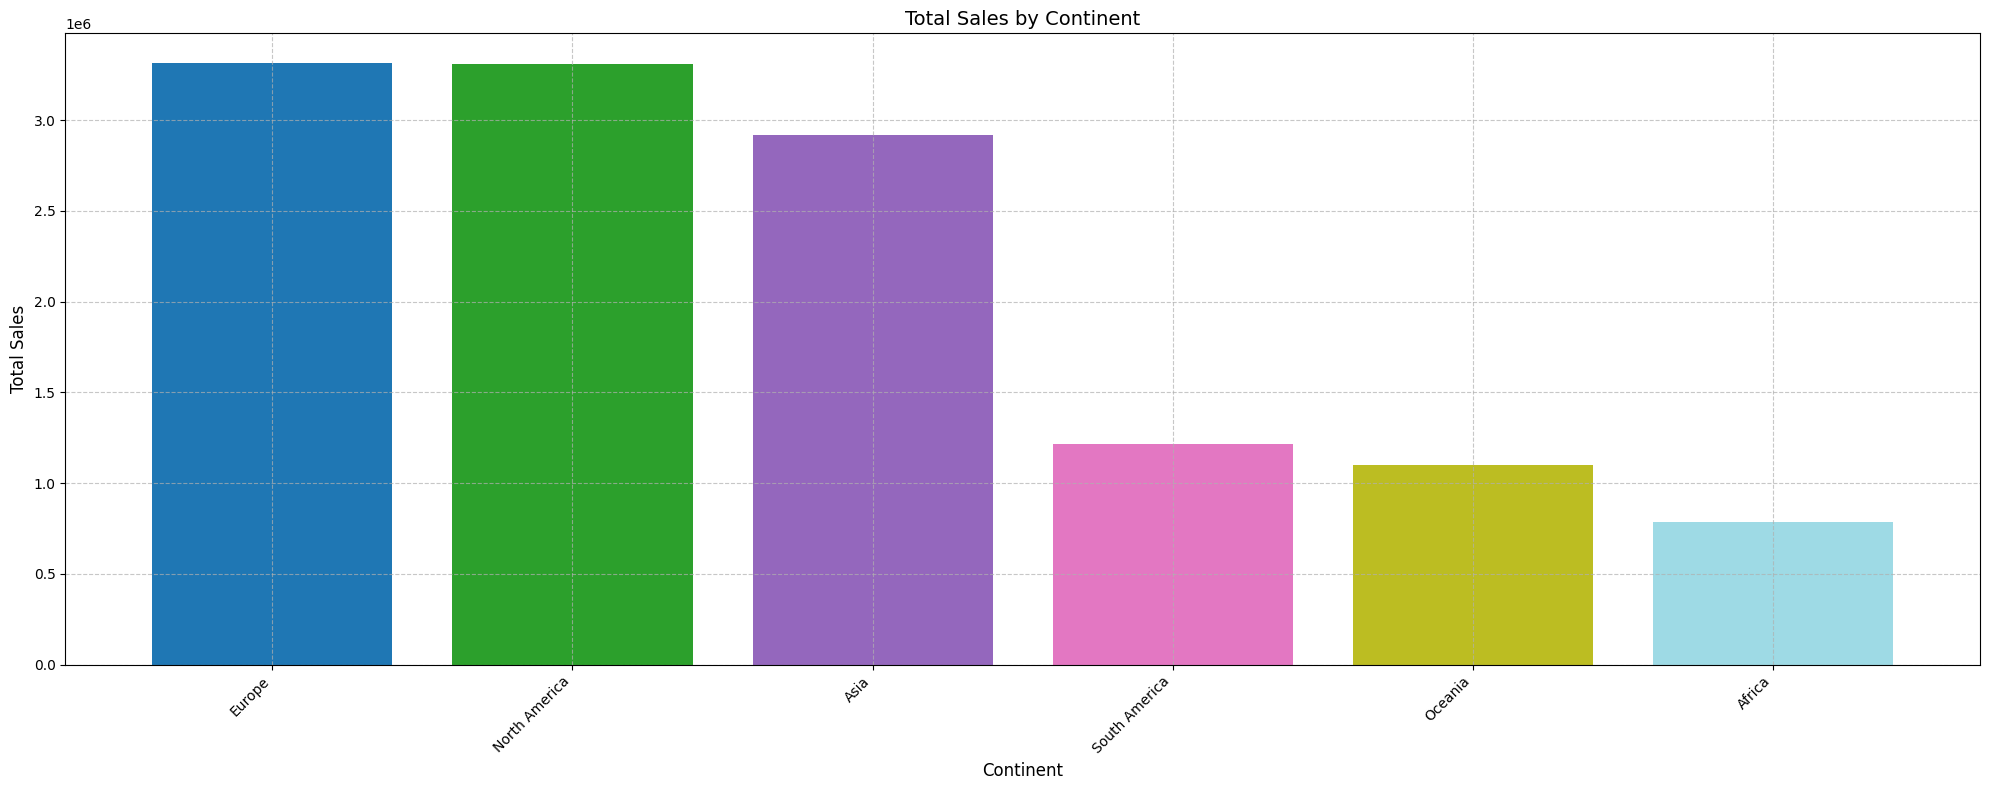

In [ ]:
# Group by Continent and sum the sales
sales_by_Continent = df.groupby('Continent')['Sales'].sum().sort_values(ascending=False)

# Create a color map
cmap = cm.get_cmap('tab20', len(sales_by_Continent))  # 'tab20' is suitable for discrete colors

# Generate a list of colors based on the color map
colors = cmap(range(len(sales_by_Continent)))

# Plotting the bar chart with Matplotlib
plt.figure(figsize=(20, 8))

# Plotting bars
bars = plt.bar(sales_by_Continent.index, sales_by_Continent.values, color=colors)

# Adding titles and labels
plt.title('Total Sales by Continent', fontsize=14)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45, ha='right')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

***A bar chart showing 'Total Sales by Continent'***

#**Line Chart**

In [ ]:
# Convert Order Date to datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'])

In [ ]:
# Extract the month from the Order Date
df['Month'] = df['Order.Date'].dt.month

In [ ]:
# Group by Month and sum the sales
sales_by_month = df.groupby('Month')['Sales'].sum()
sales_by_month

,Sales
Month,
1,675141
2,543768
3,770519
4,698603
5,904061
6,1269751
7,749423
8,1293852
9,1437432


<Figure size 1200x600 with 0 Axes>

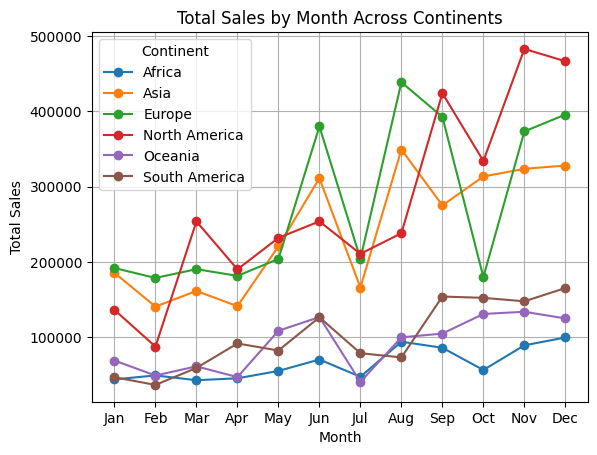

In [ ]:

# Pivot the data to get total sales by month for each Continent
sales_by_month_Continent = df.pivot_table(index='Month', columns='Continent', values='Sales', aggfunc='sum')

# Plot the multi-line chart
plt.figure(figsize=(12, 6))
sales_by_month_Continent.plot(kind='line', marker='o', title='Total Sales by Month Across Continents')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Continent')
plt.show()

***A line chart showing 'Total Sales by Month Across Continents'***

#**Scatter Plot**

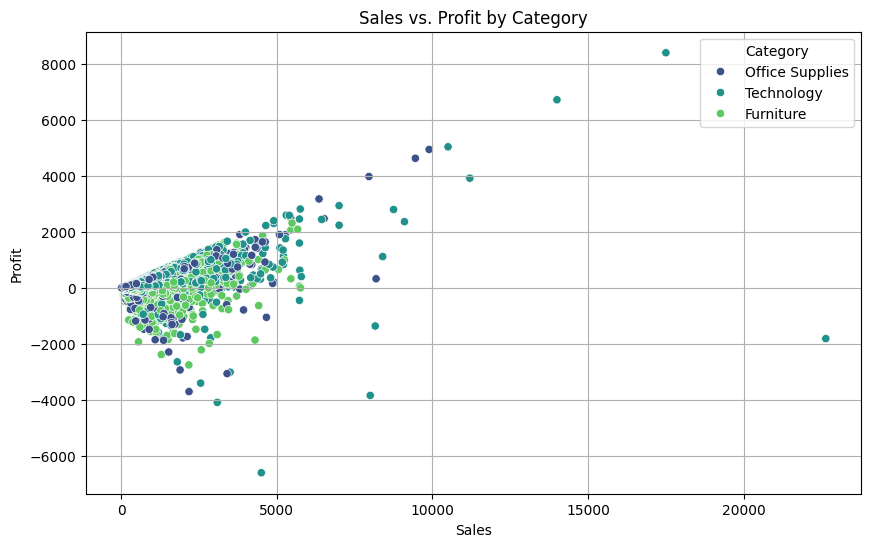

In [ ]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', palette='viridis')
plt.title('Sales vs. Profit by Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

***A scatter plot showing 'Sales vs. Profit by Category'***

#**Histogram**

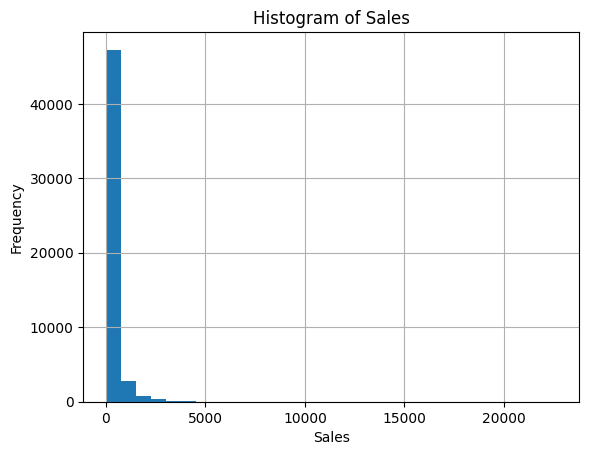

In [ ]:
# Histogram showing the distribution of Sales
df['Sales'].hist(bins=30)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

***A Histogram of 'Sales'***

#**Area Chart**

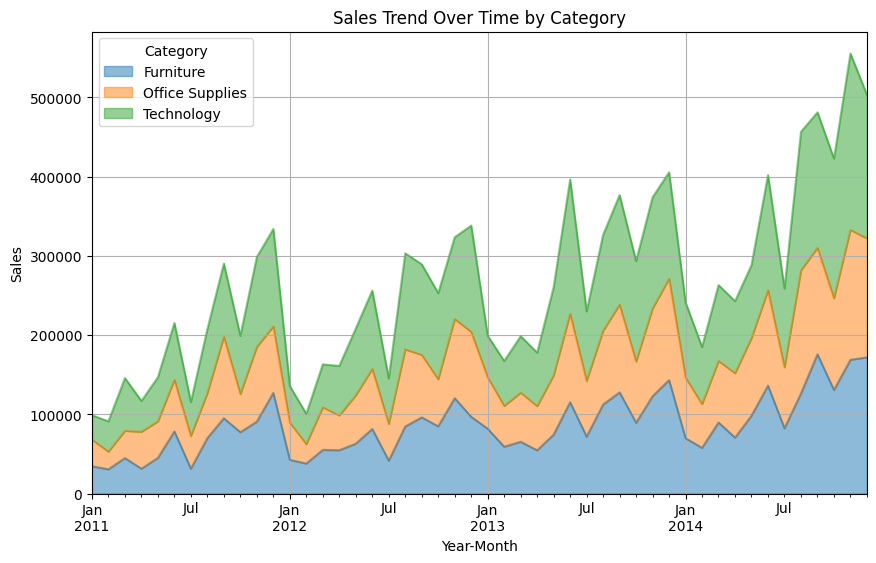

In [ ]:
#Convert 'Order.Date' to datetime and extract the year and month
df['YearMonth'] = df['Order.Date'].dt.to_period('M')

# Group the data by YearMonth and Category, summing the Sales
sales_by_category = df.groupby(['YearMonth', 'Category'])['Sales'].sum().unstack().fillna(0)

# Plot the area chart
sales_by_category.plot(kind='area', stacked=True, figsize=(10, 6), alpha=0.5)
plt.title('Sales Trend Over Time by Category')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(title='Category')
plt.grid(True)
plt.show()

***An area chart showing 'Sales Trend Over Time by Category'***

#**Pie Chart**

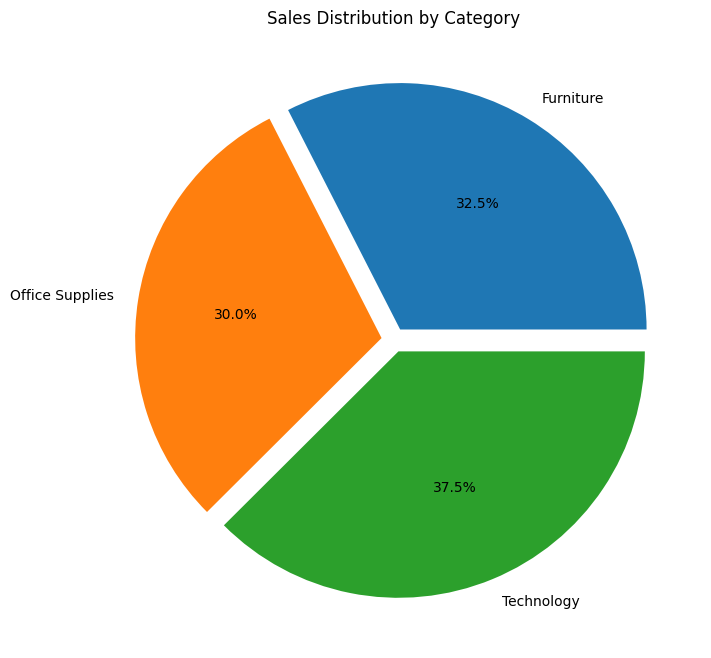

In [ ]:
# Group by Category and sum the sales
sales_by_category = df.groupby('Category')['Sales'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
sales_by_category.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Category', explode=(0.05, 0.05, 0.05))
plt.ylabel('')
plt.show()

***A pie chart showing 'Sales Distribution by Category'***

#**Box Plot**

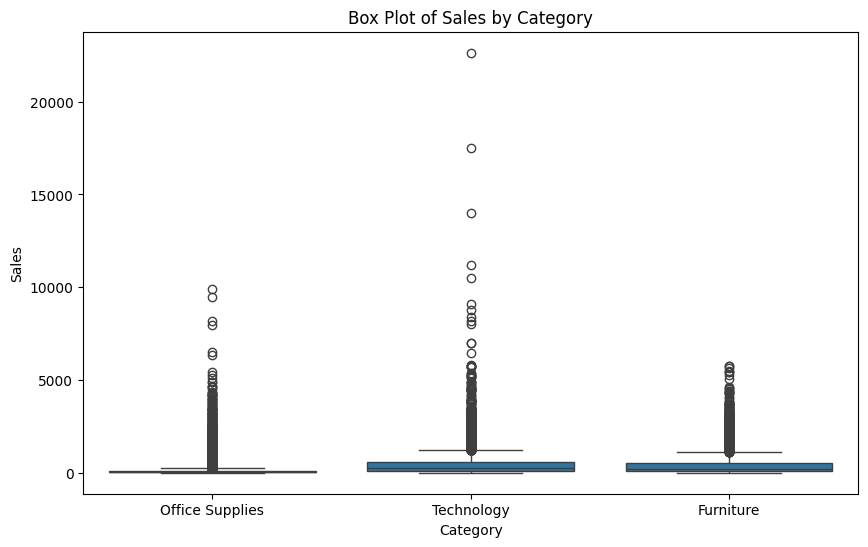

In [ ]:
# Box plot of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Box Plot of Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

***A box plot of 'Sales by Category'***

#**Bubble plot**


In [ ]:
# Sort Dataframe with 'Country' alphabetically then groupby used for sales in each country
sales_by_country = df.sort_values(["Country"],ascending=False).groupby('Country')['Sales'].sum()

# Transforming Panda series to Dataframe
df_sales_by_country = pd.DataFrame({"Country":sales_by_country.index, "Sales":sales_by_country.values})

# Intializing Plot
# 'Size' of the bubble
fig = px.scatter(df_sales_by_country, x="Sales", y="Country",
	          size="Sales", color="Country", title='Sum of Sales by Country',
                 hover_name="Country", log_x=False, size_max=80)
fig.show()

***A bubble plot showing 'Sum of Sales by Country'***

#**Tree map**

In [ ]:
fig = px.treemap(df, path=[px.Constant("Market"),'Continent', 'Country'], values='Sales',
                  color='Continent', hover_data=['Sales'],
                  title='Sales by Continent and Country',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_sales_by_country["Sales"], weights=df_sales_by_country["Sales"]))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

***A tree map showing 'Sales by Continent and Country'***

#**Waffle Chart**

In [ ]:
df['Category'].value_counts()

,count
Category,
Office Supplies,31273
Technology,10141
Furniture,9876


In [ ]:
# Calculate the percentage of orders for each market
market_counts = df['Category'].value_counts(normalize=True) * 100
market_counts

,proportion
Category,
Office Supplies,60.972899
Technology,19.771885
Furniture,19.255215


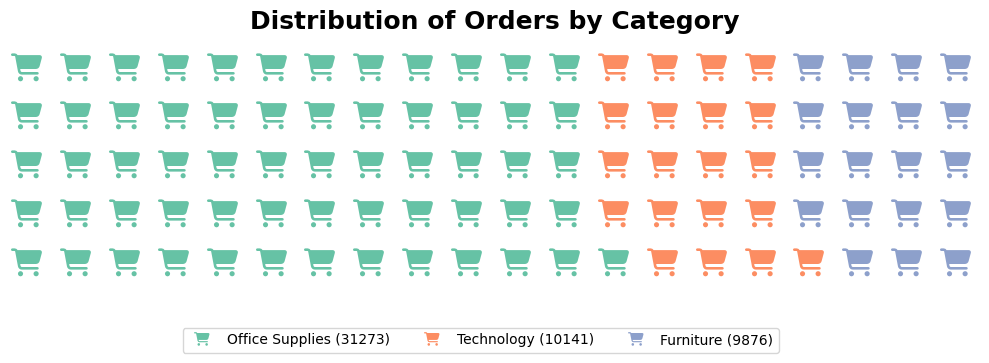

In [ ]:
fig = plt.figure(
    figsize=(10,60),
    FigureClass=Waffle,
    rows=5,
    columns=20,
    values=market_counts,
    legend={'labels': [f"{k} ({v})" for k, v in zip(df['Category'].unique(),df['Category'].value_counts())],'bbox_to_anchor': (0.8, -0.2), 'ncol':3},
    icons='shopping-cart',
    icon_size=20,
    icon_legend=True,
    title={'label': 'Distribution of Orders by Category', 'loc': 'center', 'fontsize': 18, 'fontweight': 'bold'}
)
plt.show()

***A waffle chart showing 'Distribution of Orders by Category'***

#**Word Clouds**

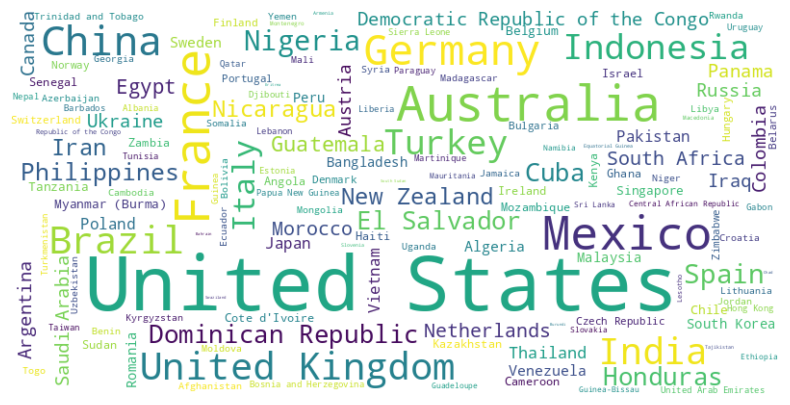

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df['Country'].value_counts())

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

***A word cloud based on 'OrderCount by *Countries*'***

World cloud showing:

In [ ]:
# save mask to WorldMap_mask
WorldMap_mask = np.array(Image.open(urllib.request.urlopen('https://raw.githubusercontent.com/ANK002X/CourseraProjects/main/wm_bw.jpg')))

# Image Attribution <a href="https://www.vecteezy.com/free-vector/geography">Geography Vectors by Vecteezy</a>

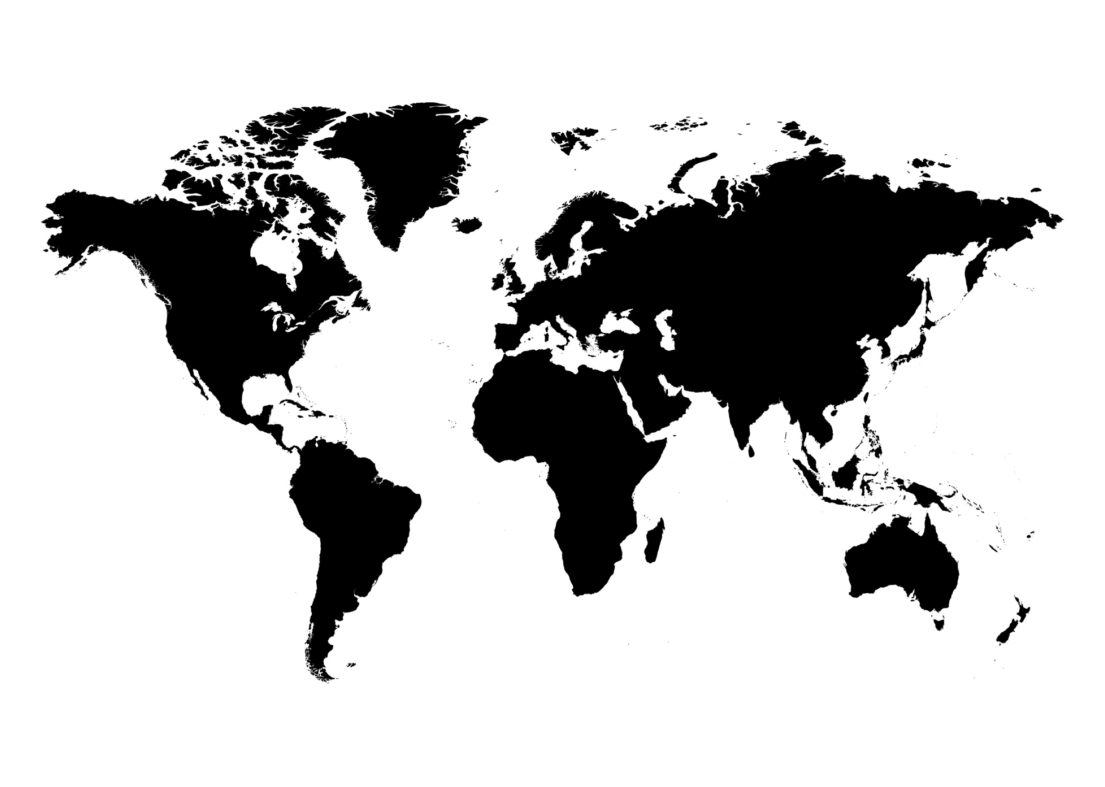

In [ ]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(WorldMap_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

***A world map image file***

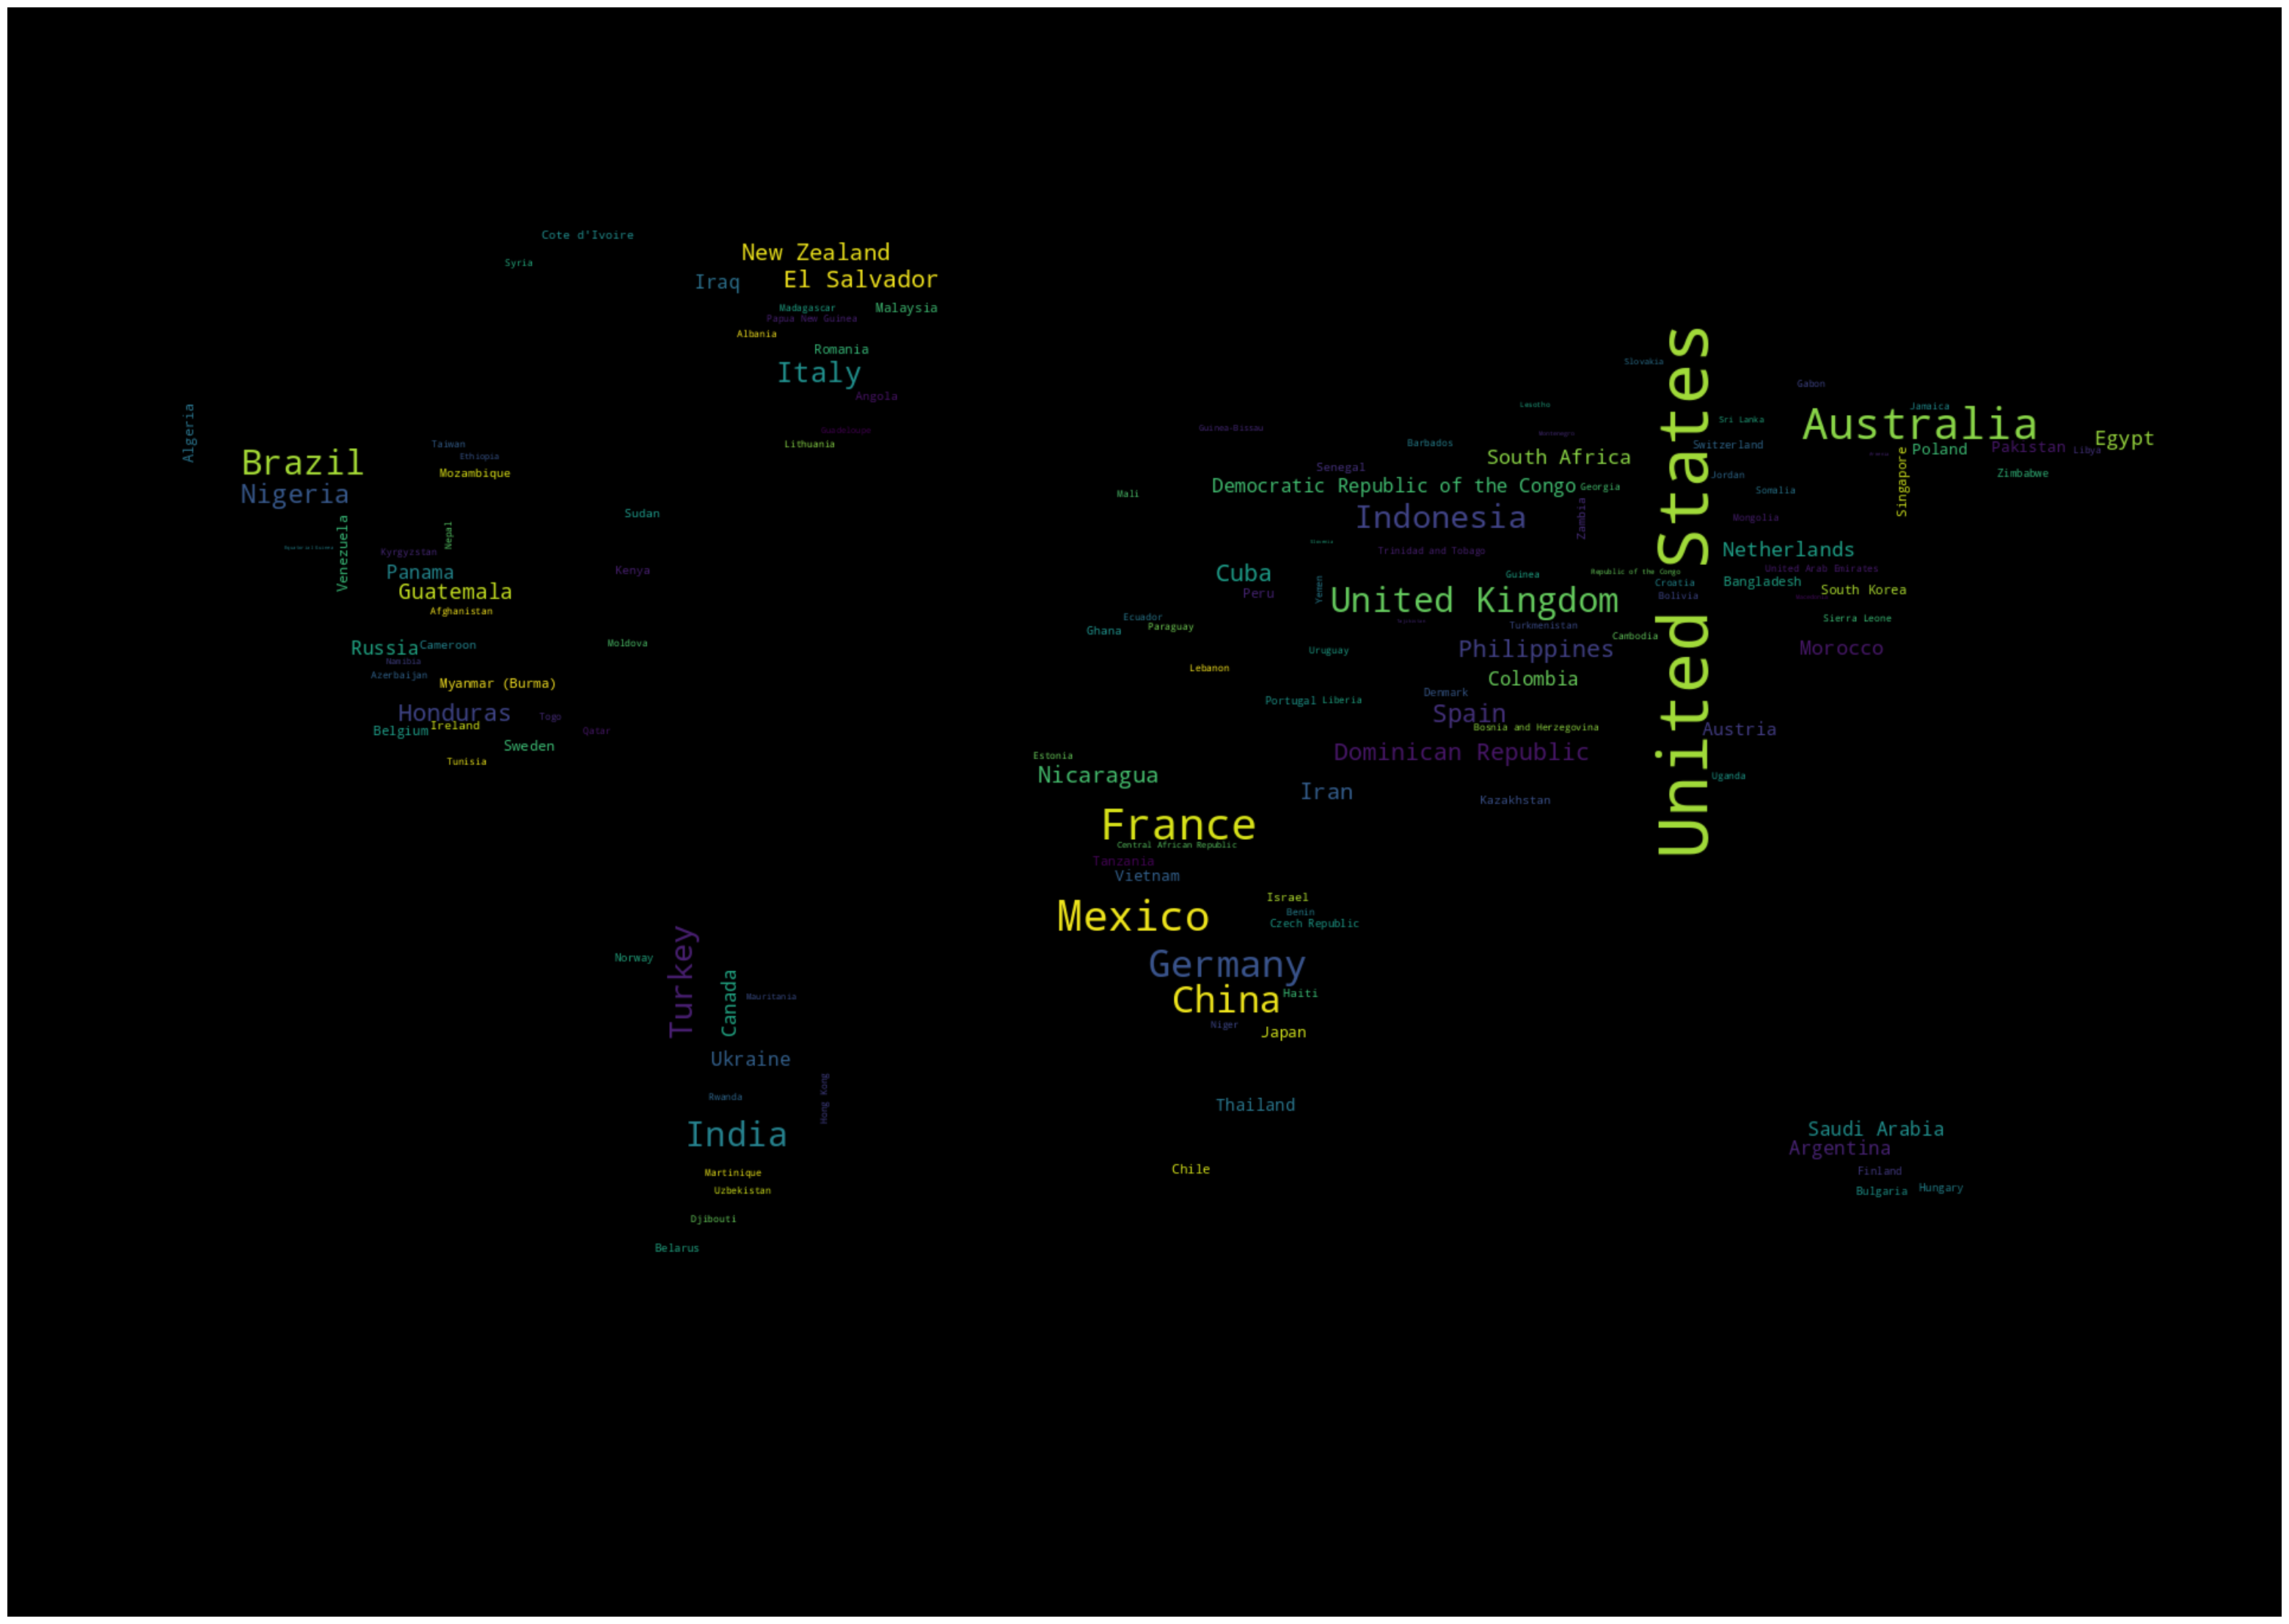

In [ ]:
sales_wc = WordCloud(background_color='Black', mask=WorldMap_mask)

sales_wc.generate_from_frequencies(df['Country'].value_counts())

fig = plt.figure(figsize=(40, 50))
plt.imshow(sales_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

***A word cloud based on 'OrderCount by Countries' plotted on world map mask***

#**Geospatial Visualization**

In [ ]:
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

<ipython-input-35-3139f4b26b8d>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<Axes: >

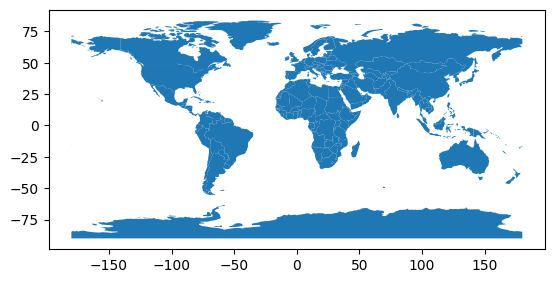

In [ ]:
# Display the World Map
world.plot()

***Unpopulated world map***

In [ ]:
world['name'].replace('United States of America', 'United States', inplace=True)

In [ ]:
# Grouping the data by country and sum the sales
country_sales = df.groupby('Country')['Sales'].sum().reset_index()
country_sales.head()

,Country,Sales
0,Afghanistan,21674
1,Albania,3888
2,Algeria,36090
3,Angola,25551
4,Argentina,57510


In [ ]:
# Merging the sales data with the world map data
world_sales = world.merge(country_sales, left_on='name', right_on='Country', how='left')
world_sales.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Sales
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,26816.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,66932.0
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2297354.0


In [ ]:
# Folium map centered on the world
markerMap = folium.Map(location=[30, 0], zoom_start=3)

# Markers for each country with sales total
for _, row in world_sales.iterrows():
    if not pd.isna(row['Sales']):
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=f"{row['name']}: ${row['Sales']:,.2f}",
            icon=folium.Icon(color='green', icon='dollar', prefix='fa')
        ).add_to(markerMap)

# Plotting the map
markerMap

***A world map with markers showing the total sales(2011-2014) of the respective country***

#**Choropleth+Marker Map**

In [ ]:
# Grouping the data by country and sum the sales
country_profit = df.groupby('Country')['Profit'].sum().reset_index()
country_profit.head()

country_profit_ratio = (df.groupby('Country')['Profit'].sum() / df.groupby('Country')['Sales'].sum()) * 100
country_profit_ratio = country_profit_ratio.to_frame().reset_index()
country_profit_ratio.columns = ['Country', 'Profit']
country_profit_ratio.head()

,Country,Profit
0,Afghanistan,25.192858
1,Albania,18.243827
2,Algeria,25.232751
3,Angola,25.419631
4,Argentina,-32.505298


In [ ]:
# Merging the sales data with the world map data
world_profit_ratio = world.merge(country_profit_ratio, left_on='name', right_on='Country', how='left')
world_profit_ratio.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Profit
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,21.360266
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,26.620137
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,12.466386


In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_profit_ratio,
    name='choropleth',
    data=world_profit_ratio,
    columns=['Country', 'Profit'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Profit by Country'
).add_to(world_map)

# labels for country sales
for _, row in world_profit_ratio.iterrows():
    if not pd.isna(row['Profit']):
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=f"{row['name']}: {row['Profit']:,.2f}%",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(world_map)

world_map

In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_sales,
    name='choropleth',
    data=world_sales,
    columns=['Country', 'Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales by Country'
).add_to(world_map)

# labels for country sales
for _, row in world_sales.iterrows():
    if not pd.isna(row['Sales']):
        folium.Marker(
            location=[row['geometry'].centroid.y, row['geometry'].centroid.x],
            popup=f"{row['name']}: ${row['Sales']:,.2f}",
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(world_map)

world_map

In [ ]:
# Calculate Average Order Value by State

df['Average_Order_Value'] = df['Sales'] / df['Sales'].count()
avg_order_value_by_state = df.groupby('State')['Average_Order_Value'].mean().reset_index()

In [ ]:
# Preprocessing: Changed DataType: Ship.Date and Order.Date to Date Type
df['ShipDate'] = pd.to_datetime(df['Ship.Date'])
df['OrderDate'] = pd.to_datetime(df['Order.Date'])

# Calculated Column: shipping time
df['ShipTime'] = df['ShipDate'] - df['Order.Date']
df['ShipTime'] = df['ShipTime'].dt.days
df['ShipHours'] = df['ShipTime'] * 24

# Average ship time by Country
shippingTime = df.groupby('Country')['ShipTime'].mean()
shippingTimeHours = df.groupby('Country')['ShipHours'].mean()

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=shippingTimeHours.index,
    z = shippingTimeHours.values,
    locationmode = 'country names',
    colorscale = 'Reds',
    colorbar_title = "Average Shipping Hours",
))

fig.update_layout(
    title_text = 'Average Shipping Time by Country',
    geo_scope='world',
)

fig.show()


***A Choropleth map showing 'Average Shipping Time by Country'***

In [ ]:
shippingTime.sort_values(ascending=True)

,ShipTime
Country,
Chad,2.000000
Bahrain,2.000000
Guinea-Bissau,2.444444
Estonia,2.461538
Swaziland,2.500000
...,...
Tajikistan,5.000000
Jamaica,5.032258
Macedonia,5.250000
